In [1]:
#Basic Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Data Pre-processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

#Model Training and Validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, plot_confusion_matrix

#ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

#Model Export
import joblib
from joblib import dump #from joblib import load > to load .pkl file

In [2]:
#import Telecom_Customer_Churn.csv file
df=pd.read_csv('Telecom_Customer_Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Finding:
    1. No missing value in any features.
    2. Only 3 features is not object, all others are string and if need to be converted later when cleaning one by one variable.
    3. 2 features SeniorCitizen and tenure are int type and MonthlyCharges are float type.
    4. Dataset having 7403 row with 21 featuses.

### Check null value

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

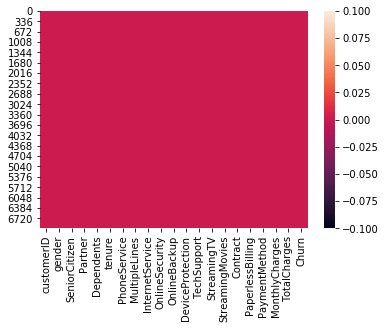

In [7]:
sns.heatmap(df.isnull())
plt.show()

## Summary Statistics

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# Check correlation
df.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


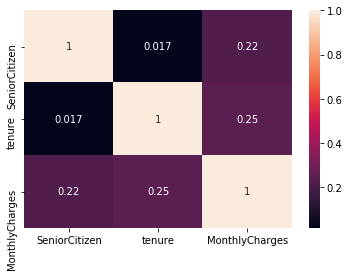

In [10]:
sns.heatmap(df.corr(),cmap='rocket',annot=True)

Observation:- Monthlycharges are postive correlated all others numerical features.

Skewness of tenure = 0.24
Skewness of MonthlyCharges = -0.22


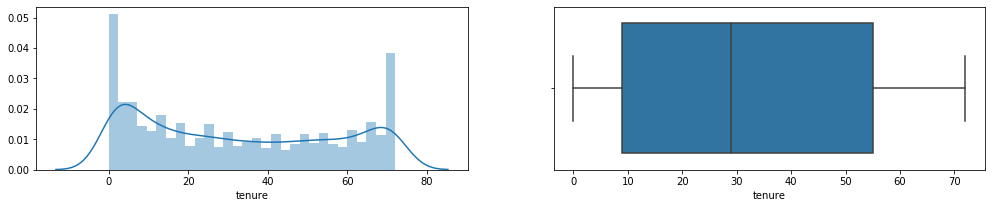

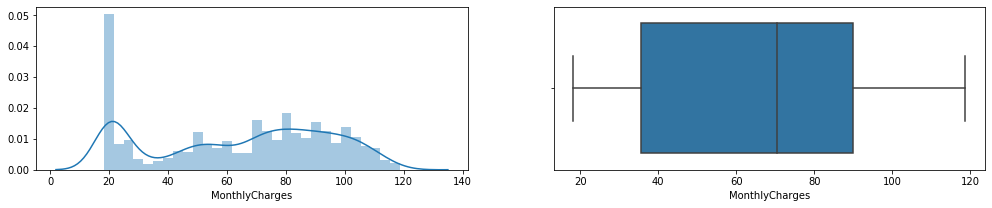

In [11]:
#Univariate analysis of numerical features
for i in ['tenure', 'MonthlyCharges']:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

## Exploring the data variable 

In [12]:
for i in df.columns:
    print(i)
    print('# of unique values -->', df[i].nunique())
    if df[i].nunique()<15:
        print(df[i].unique())
    else:
        print(df[i].describe())
    print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

customerID
# of unique values --> 7043
count           7043
unique          7043
top       4558-CGYCZ
freq               1
Name: customerID, dtype: object
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gender
# of unique values --> 2
['Female' 'Male']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
SeniorCitizen
# of unique values --> 2
[0 1]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Partner
# of unique values --> 2
['Yes' 'No']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dependents
# of unique values --> 2
['No' 'Yes']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
tenure
# of unique values --> 73
count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### Data Cleaning - SeniorCitizen

In [13]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [14]:
df['SeniorCitizen'].replace({1:'Yes', 0:'No'}, inplace=True)
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

Reamark:- 
    No phone service replace with No in all features.

In [15]:
df['MultipleLines'].replace({'No phone service':'No'}, inplace=True)
df['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df['OnlineSecurity'].replace({'No internet service':'No'}, inplace=True)
df['OnlineSecurity'].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
df['OnlineBackup'].replace({'No internet service':'No'}, inplace=True)
df['OnlineBackup'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
df['DeviceProtection'].replace({'No internet service':'No'}, inplace=True)
df['DeviceProtection'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df['TechSupport'].replace({'No internet service':'No'}, inplace=True)
df['TechSupport'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df['StreamingTV'].replace({'No internet service':'No'}, inplace=True)
df['StreamingTV'].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
df['StreamingMovies'].replace({'No internet service':'No'}, inplace=True)
df['StreamingMovies'].unique()

array(['No', 'Yes'], dtype=object)

### Data Cleaning - Contract

In [22]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

### Data Cleaning - PaymentMethod

In [23]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [24]:
df['PaymentMethod'].replace({'Electronic check':'E-Cheque', 'Mailed check':'Mailed-Cheque',
                             'Bank transfer (automatic)':'Auto-Bank-Transfer',
                             'Credit card (automatic)':'Auto-CreditCard'}, inplace=True)
df['PaymentMethod'].unique()

array(['E-Cheque', 'Mailed-Cheque', 'Auto-Bank-Transfer',
       'Auto-CreditCard'], dtype=object)

### Data Cleaning - TotalCharges

In [25]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
6352.4      1
193.8       1
5727.45     1
4847.05     1
152.6       1
Name: TotalCharges, Length: 6531, dtype: int64

In [26]:
df = df[df['TotalCharges']!=' ']
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.shape

(7032, 21)

In [27]:
df.drop(columns=['customerID'], axis=1, inplace=True)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

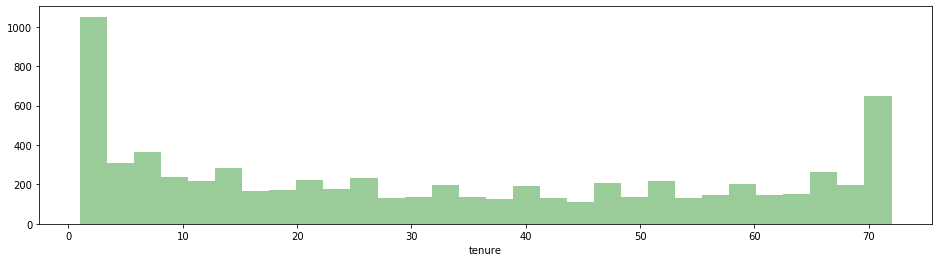

In [28]:
plt.figure(figsize=(16,4))
sns.distplot(df['tenure'], bins=30, kde=False, color='Green')

In [29]:
#seprate the categorical columns and numerical columns
cat_df, num_df = [], []
for i in df:
    if df[i].dtypes=='object':
        cat_df.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'):
        num_df.append(i)
    else: print('Unknown >', i)
print('>>> Total Number of Features ::', df.shape[1])
print('>>> Number of Categorical Features ::', len(cat_df))
print('>>> Number of Numerical Features ::', len(num_df))

>>> Total Number of Features :: 20
>>> Number of Categorical Features :: 17
>>> Number of Numerical Features :: 3


Skewness of tenure = 0.24
Skewness of MonthlyCharges = -0.22
Skewness of TotalCharges = 0.96


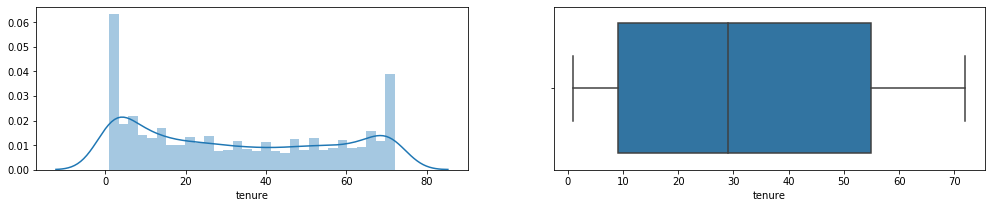

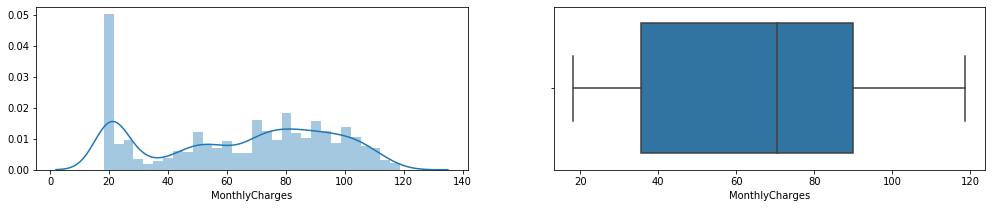

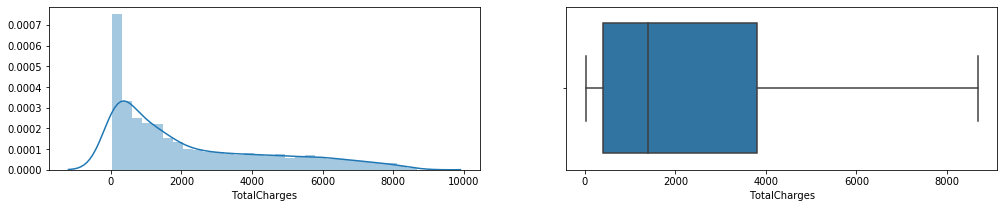

In [30]:
#Univariate analysis of numerical features
for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

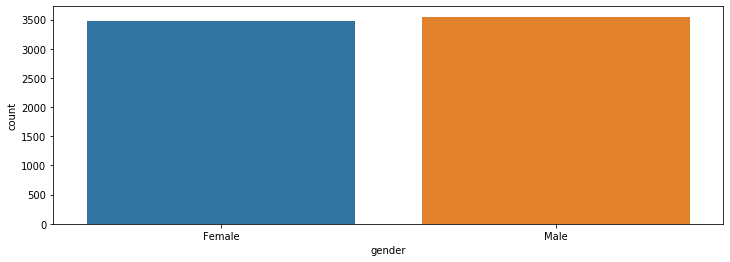

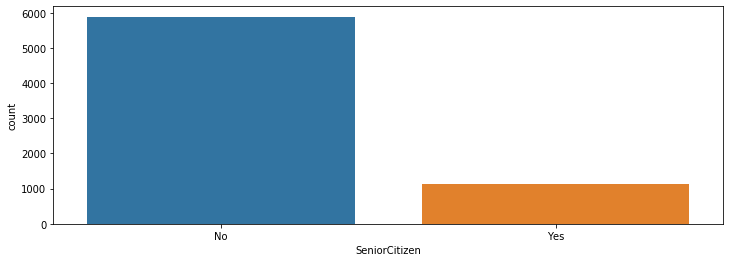

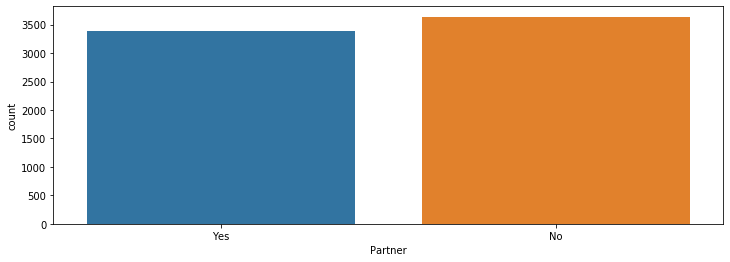

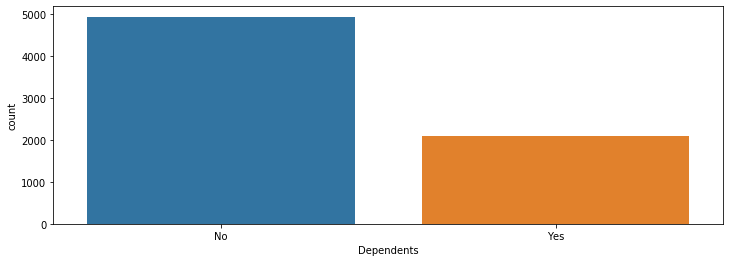

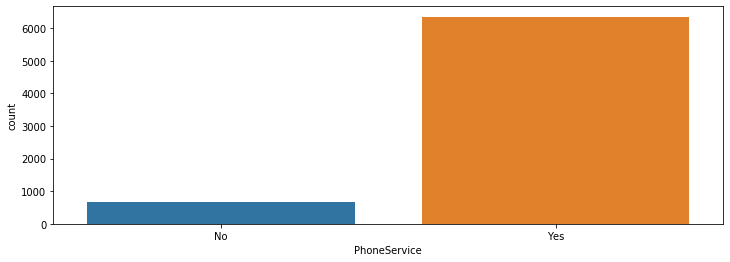

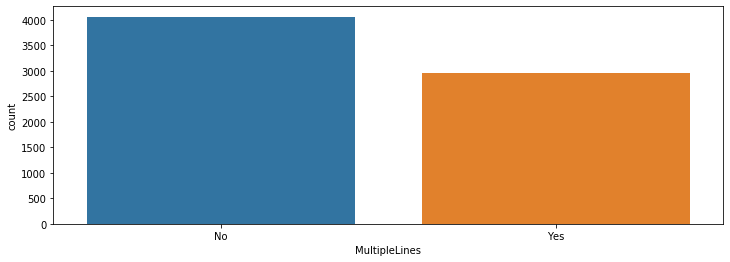

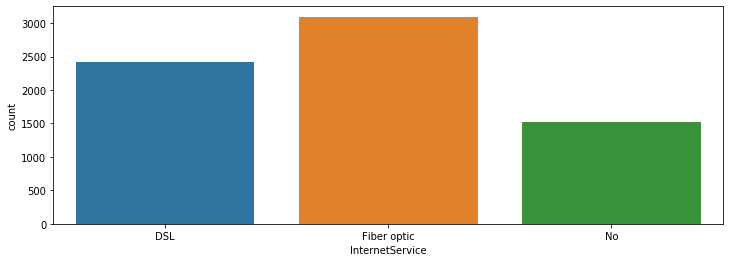

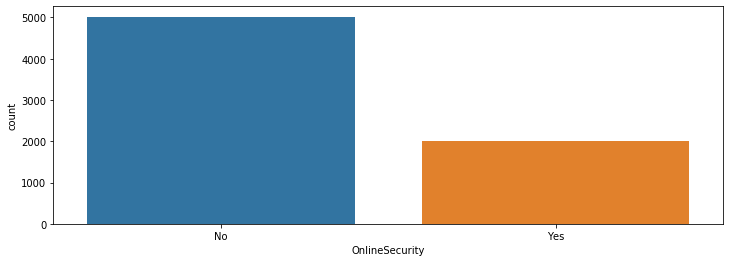

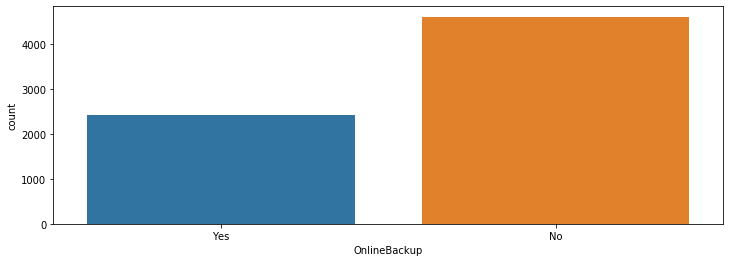

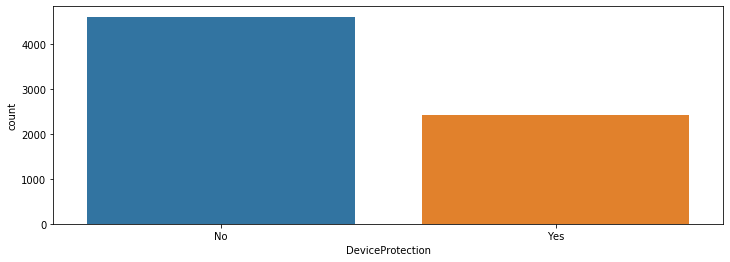

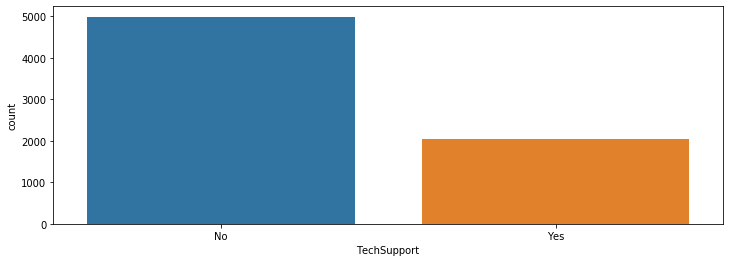

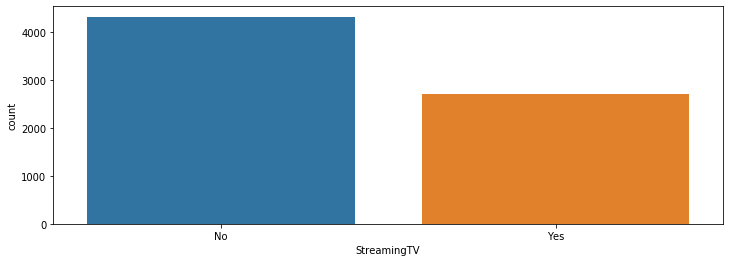

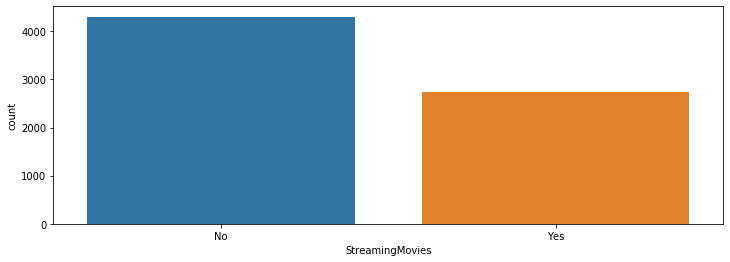

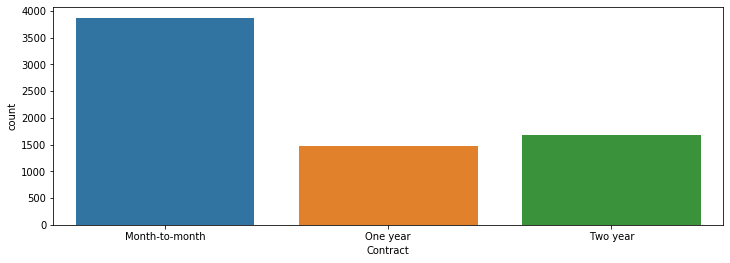

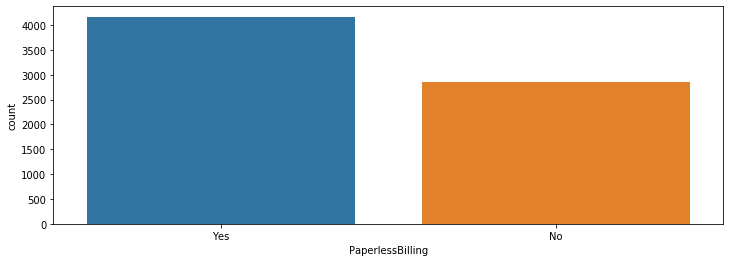

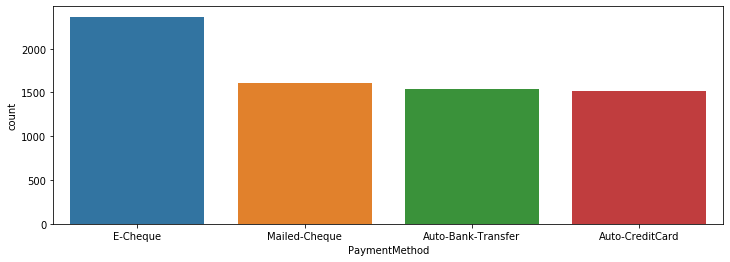

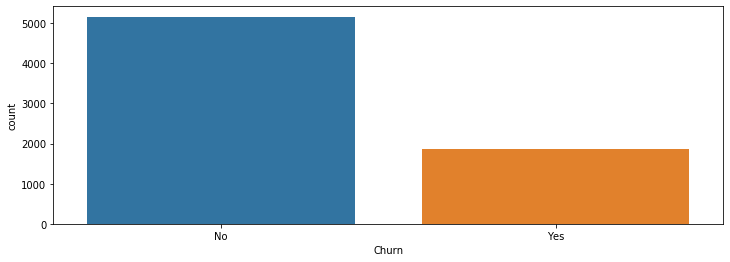

In [31]:
#Univariate analysis of categorical features
for i in cat_df:
    f=plt.figure(figsize=(12,4))
    f.add_subplot(1,1,1)
    sns.countplot(df[i])

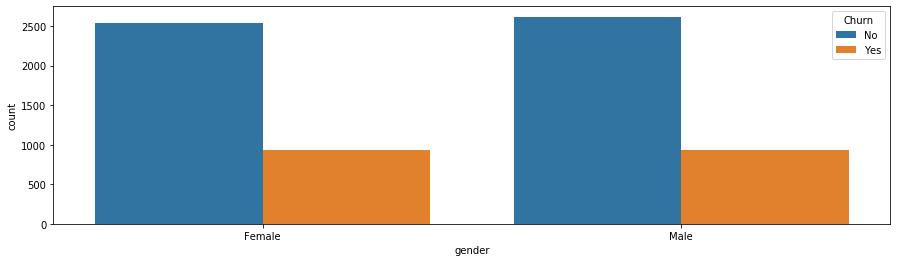

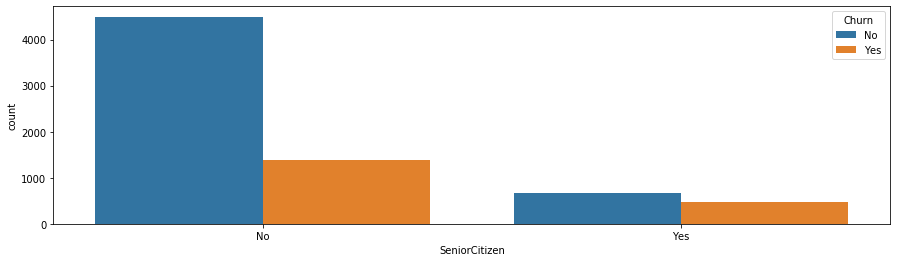

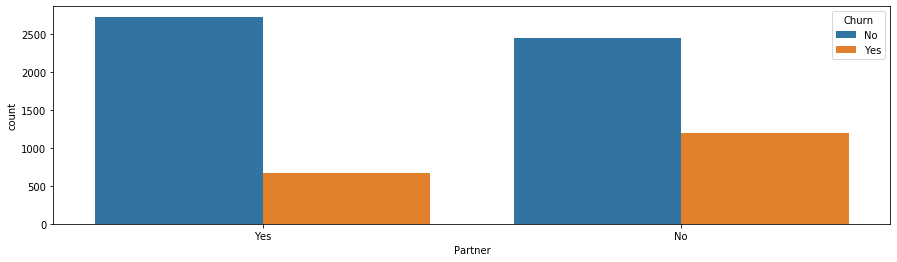

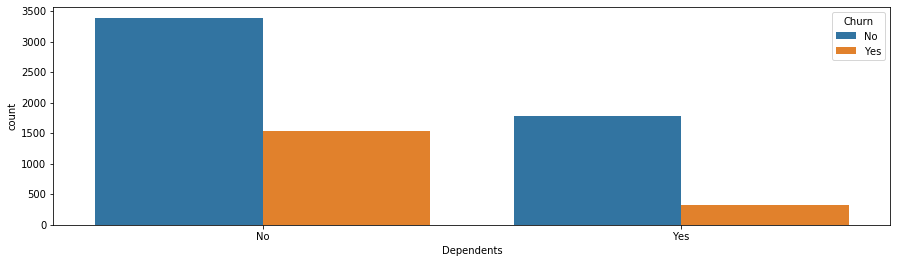

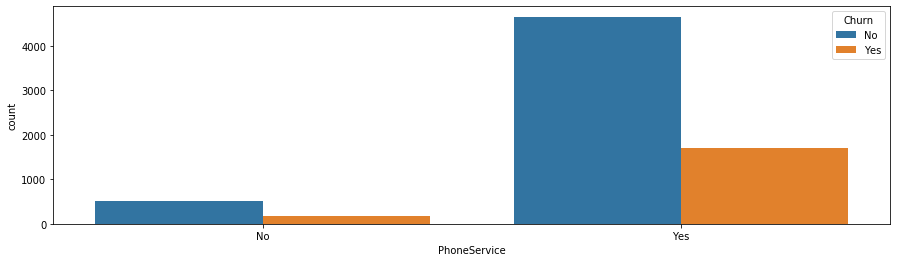

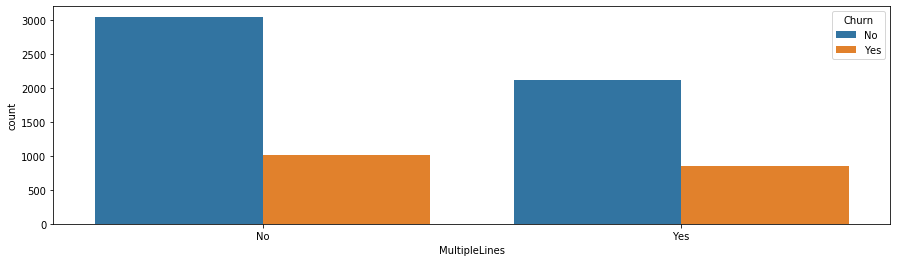

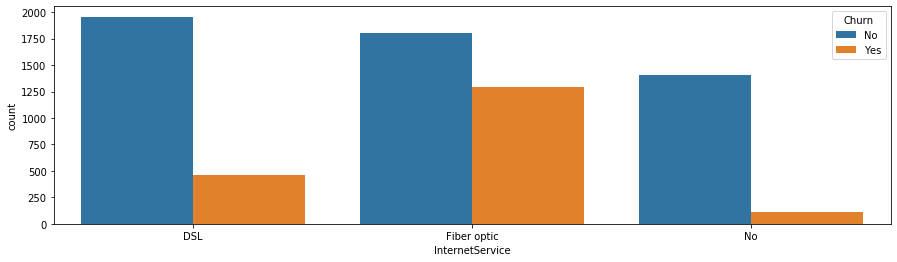

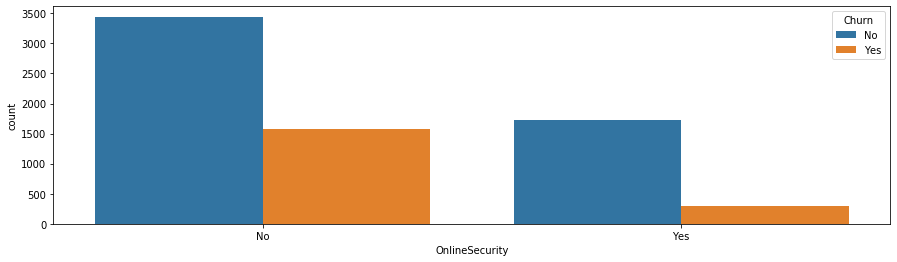

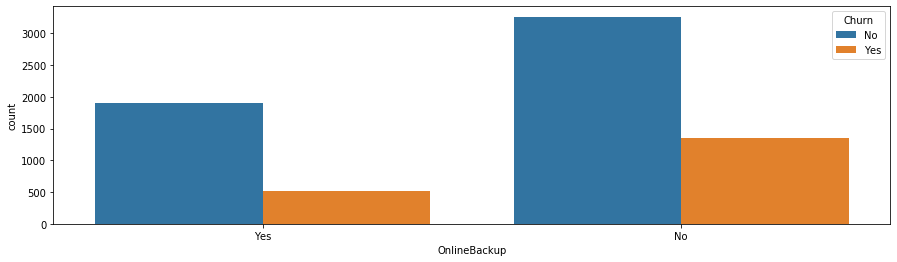

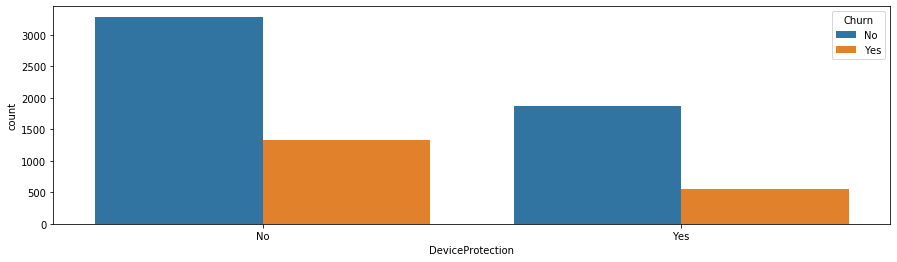

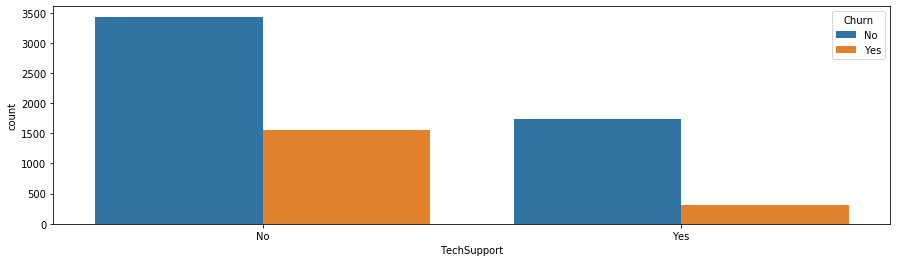

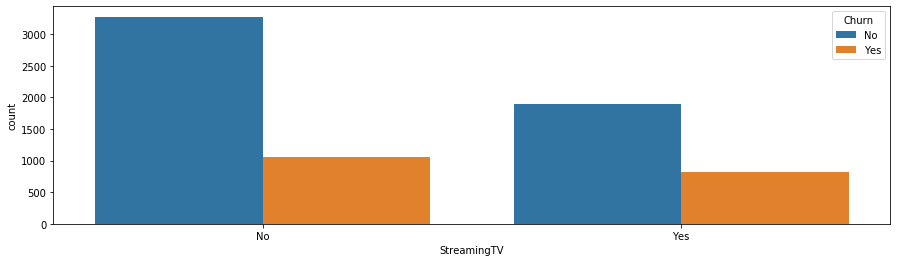

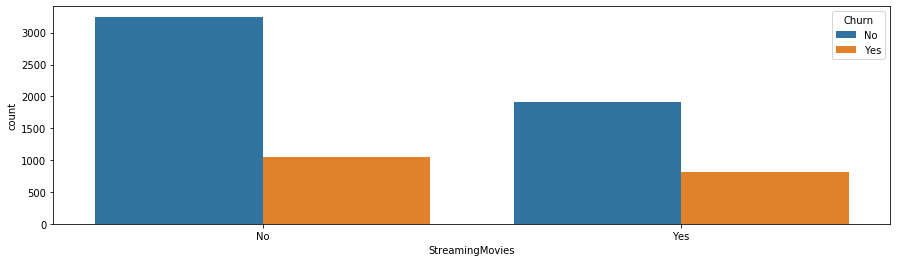

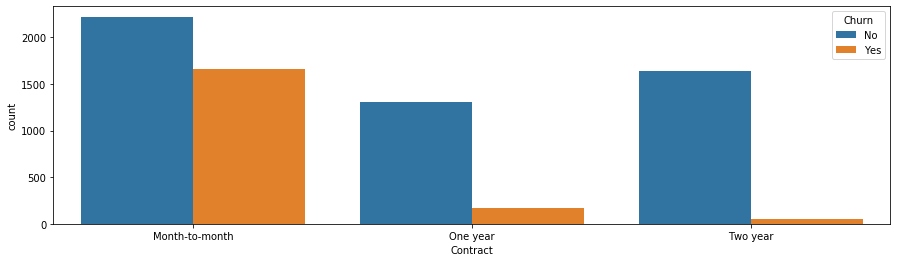

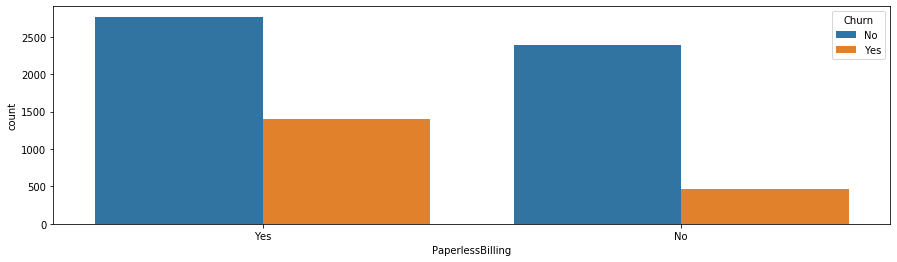

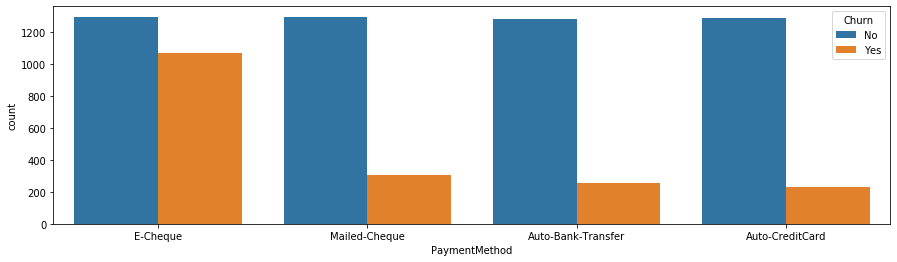

In [32]:
for i in [x for x in df.columns if x not in num_df + ['Churn']] :
    plt.figure(figsize=(15,4))
    sns.countplot(x=i, data=df, hue='Churn')

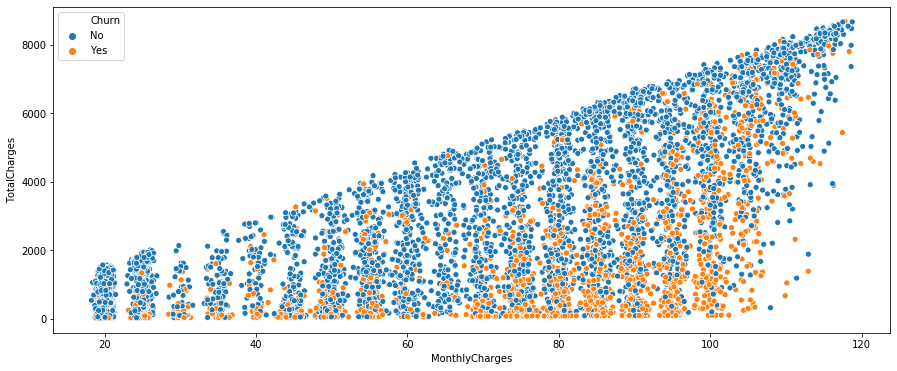

In [33]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)

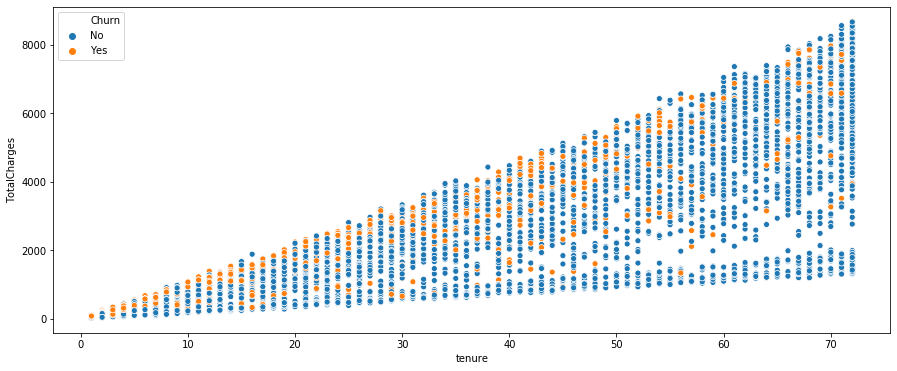

In [34]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df)

Text(0, 0.5, '% of Churn')

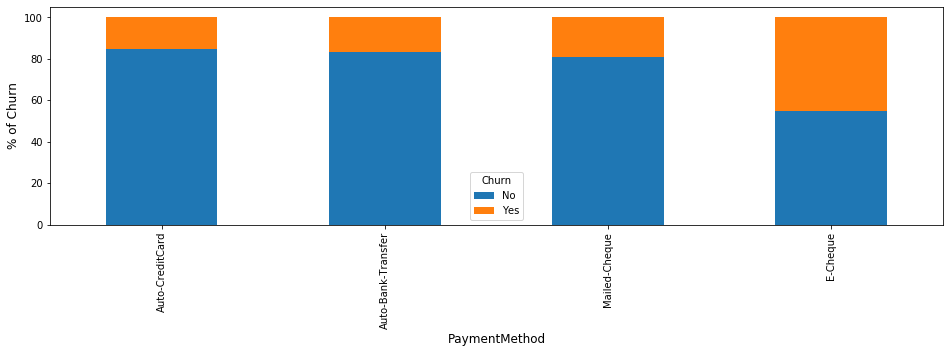

In [35]:
tbl=pd.crosstab(df['PaymentMethod'], df['Churn'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by='Yes').plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('PaymentMethod',fontsize=12)
plt.ylabel('% of Churn',fontsize=12)

Text(0, 0.5, '% of StreamingTV')

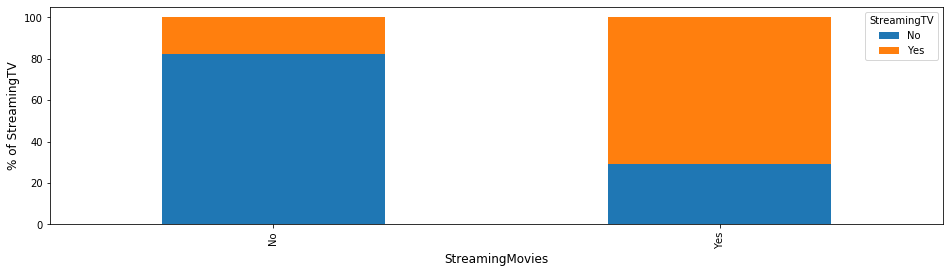

In [36]:
tbl=pd.crosstab(df['StreamingMovies'], df['StreamingTV'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by='Yes').plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('StreamingMovies',fontsize=12)
plt.ylabel('% of StreamingTV',fontsize=12)

Text(0, 0.5, '% of PaperlessBilling')

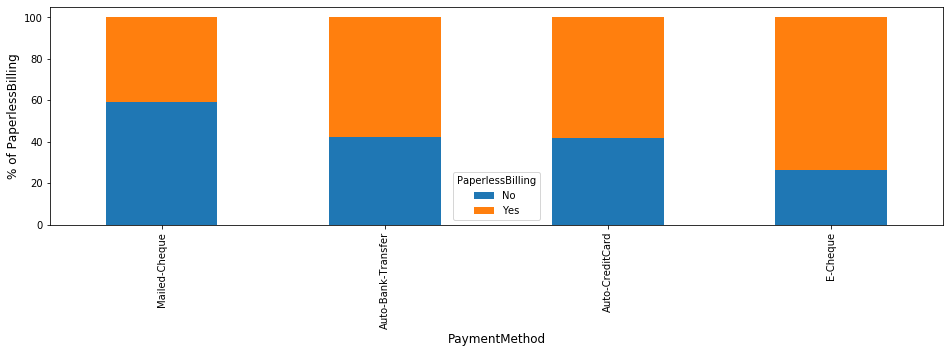

In [37]:
tbl=pd.crosstab(df['PaymentMethod'], df['PaperlessBilling'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by='Yes').plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('PaymentMethod',fontsize=12)
plt.ylabel('% of PaperlessBilling',fontsize=12)

Text(0, 0.5, '% of MultipleLines')

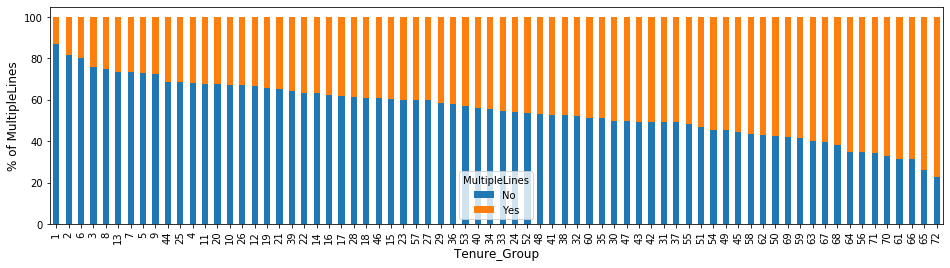

In [38]:
tbl=pd.crosstab(df['tenure'], df['MultipleLines'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by='Yes').plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('Tenure_Group',fontsize=12)
plt.ylabel('% of MultipleLines',fontsize=12)

Text(0, 0.5, '% of Churn')

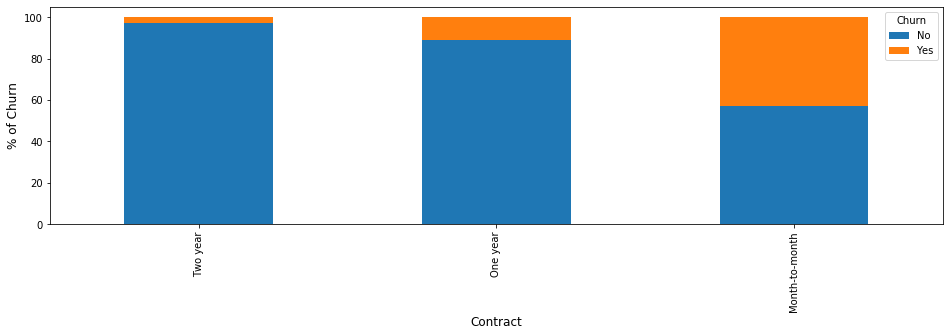

In [39]:
tbl=pd.crosstab(df['Contract'], df['Churn'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(by='Yes').plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('Contract',fontsize=12)
plt.ylabel('% of Churn',fontsize=12)

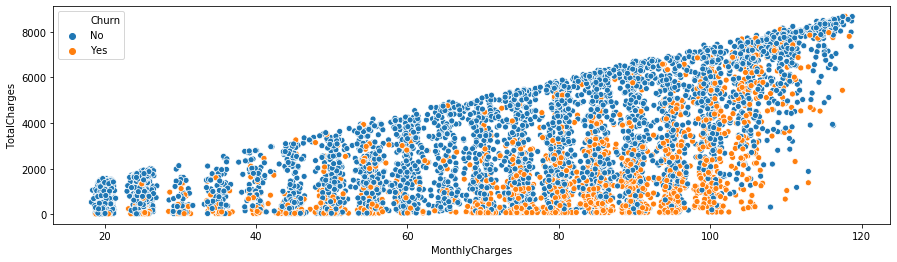

In [40]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',hue='Churn',data=df)

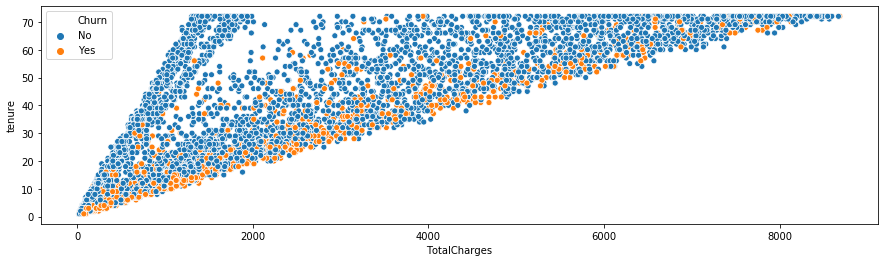

In [41]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='TotalCharges',y='tenure',hue='Churn',data=df)

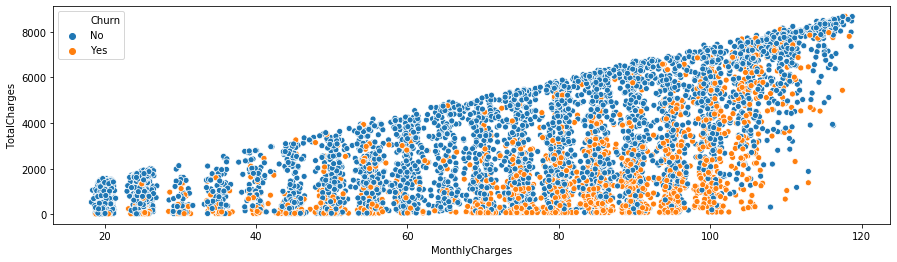

In [42]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',hue='Churn',data=df)

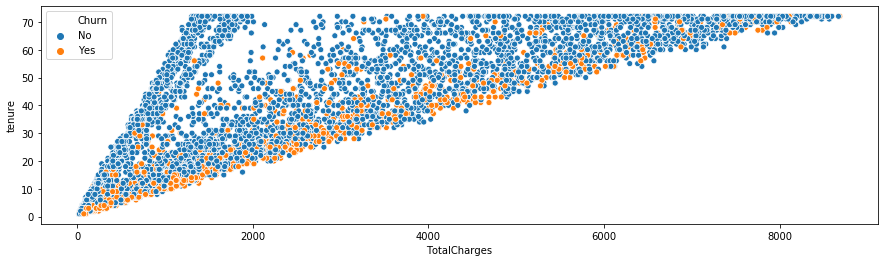

In [43]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='TotalCharges',y='tenure',hue='Churn',data=df)

In [44]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,E-Cheque,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed-Cheque,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed-Cheque,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Auto-Bank-Transfer,42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,E-Cheque,70.70,151.65,Yes


In [45]:
#We will convert all categorical variables into numeric types using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


col=['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
for i in col:
    df[i]=le.fit_transform(df[i])

In [46]:
# Splitting x and y from data
x = df.drop(columns=['Churn'], axis=1)
y = df['Churn']

In [47]:
# Instantiate and scale the data
ss=StandardScaler()
x=ss.fit_transform(x)

## Machine Learning Algorithm

In [48]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [49]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(5625, 19) 		 (1407, 19)


In [50]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(5625,) 	 (1407,)


In [51]:
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV,cross_val_score

In [52]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
neighbors={'n_neighbors':range(1,30)}
bknn=GridSearchCV(knn,neighbors)
bknn.fit(x_train,y_train)
bknn.best_params_

{'n_neighbors': 18}

In [53]:
KNN=KNeighborsClassifier(n_neighbors=18)

In [54]:
#Support Vector Classifier
from sklearn.svm import SVC

svc=SVC()
svc_parameters={'kernel':['linear','sigmoid','poly','rbf'],'C':[1,10]}
bsvc=GridSearchCV(svc,svc_parameters)
bsvc.fit(x_train,y_train)
bsvc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [55]:
SV=SVC(kernel='rbf',C=1)

In [56]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

criterion = {'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier(random_state=42)
bdtc=GridSearchCV(dtc,criterion)
bdtc.fit(x_train,y_train)
bdtc.best_params_

{'criterion': 'entropy'}

In [57]:
DTC=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [58]:
#Random Forest Classifer
from sklearn.ensemble import RandomForestClassifier

parameters = {'n_estimators':range(100,200,300)}
rf=RandomForestClassifier(random_state=42)
brf=GridSearchCV(rf,parameters)
brf.fit(x_train,y_train)
brf.best_params_

{'n_estimators': 100}

In [59]:
RFC=RandomForestClassifier(n_estimators=100,random_state=42)

In [60]:
GBC=GradientBoostingClassifier(n_estimators=250)

In [61]:
#Extra Trees Classifier

ETC=ExtraTreesClassifier(n_estimators=250)

In [62]:
#AdaBoost Classifier

ABC=AdaBoostClassifier(n_estimators=50)

In [63]:
#Bagging Classifier

BC=BaggingClassifier(n_estimators=250)

In [64]:
LR=LogisticRegression()
GNB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=18)
SV=SVC(kernel='rbf',C=1)
DTC=DecisionTreeClassifier(criterion='entropy',random_state=42)
RFC=RandomForestClassifier(n_estimators=100,random_state=42)
GBC=GradientBoostingClassifier(n_estimators=250)
ETC=ExtraTreesClassifier(n_estimators=250)
ABC=AdaBoostClassifier(n_estimators=50)
BC=BaggingClassifier(n_estimators=250)

In [65]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',GNB))
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DTC))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('ExtraTreesClassifier',ETC))
models.append(('AdaBoostClassifier',ABC))
models.append(('BaggingClassifier',BC))

In [66]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

************ LogisticRegression **********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.7931769722814499


Cross_Val_Score= 0.8019059954092848


roc_auc_score= 0.7192772207008298


classification_report
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



[[906 127]
 [164 210]]





************ GaussianNB **********


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy_score= 0.736318407960199


Cross_Val_Score=

Cross_Val_Score= 0.7868301839518945


roc_auc_score= 0.6908335102059833


classification_report
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.60      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



[[908 125]
 [186 188]]







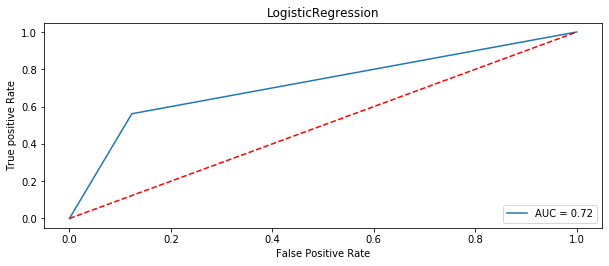

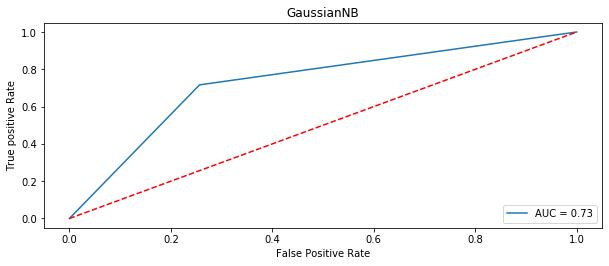

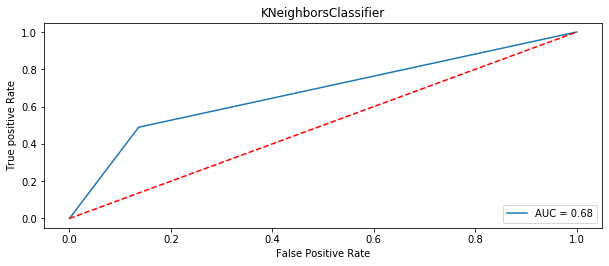

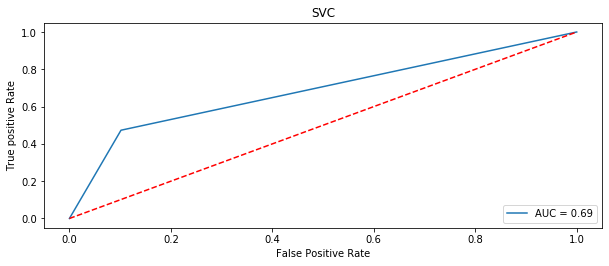

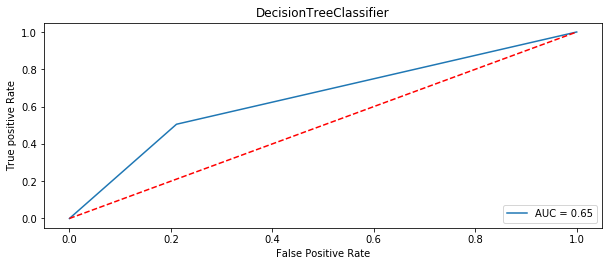

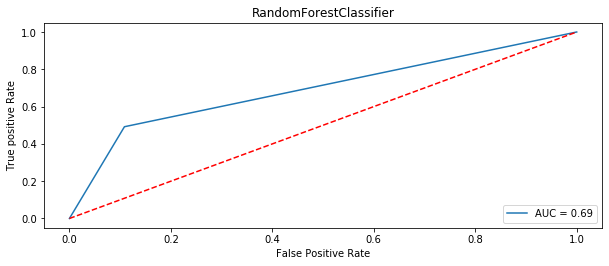

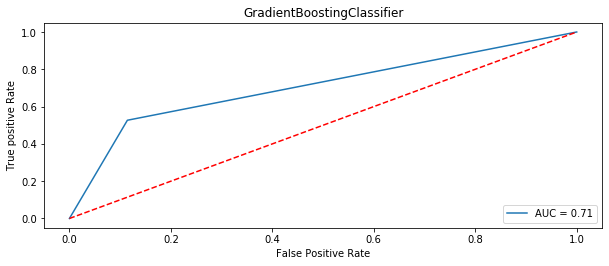

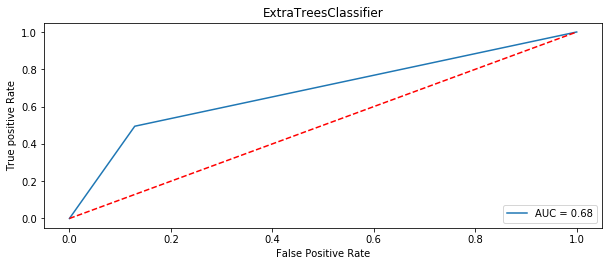

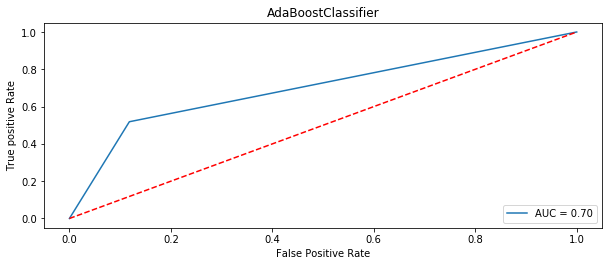

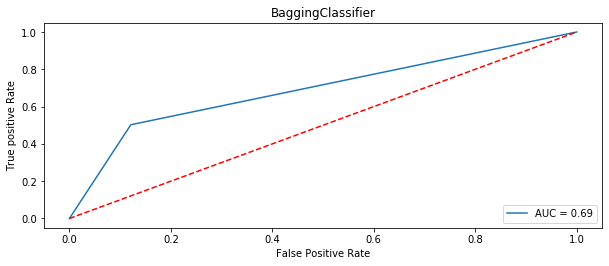

In [67]:
Model=[]
score=[]
CVS=[]
rocscore=[]
for name,model in models:
    print('************',name,'**********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    CVS.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [68]:
result = pd.DataFrame({'Model':Model,'Accuracy_score': score,'cross_val_score':CVS,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,cross_val_score,Roc_auc_curve
0,LogisticRegression,79.317697,80.190600,71.927722
1,GaussianNB,73.631841,75.540581,73.002159
2,KNeighborsClassifier,76.403696,78.270339,67.640458
3,SVC,78.535892,79.948839,68.580817
4,DecisionTreeClassifier,71.357498,73.179939,64.715589
5,RandomForestClassifier,78.535892,79.209132,69.177827
6,GradientBoostingClassifier,79.033404,80.090945,70.625379
7,ExtraTreesClassifier,77.114428,78.170988,68.295060
8,AdaBoostClassifier,78.535892,80.389483,70.030698
9,BaggingClassifier,77.896233,78.683018,69.083351


Logistic Regression gives best score by using Logistic regression achive 79% accuracy fot this dataset.


In [69]:
#save best model

import joblib
from joblib import dump #from joblib import load > to load .pkl file
joblib.dump(LR,'LR_Telecom_customer_churn.pkl')

['LR_Telecom_customer_churn.pkl']